In [1]:
#upload dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#delete ID as no use
df=df.drop('id',axis=1)

In [6]:
#convert M=0 and B=1
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


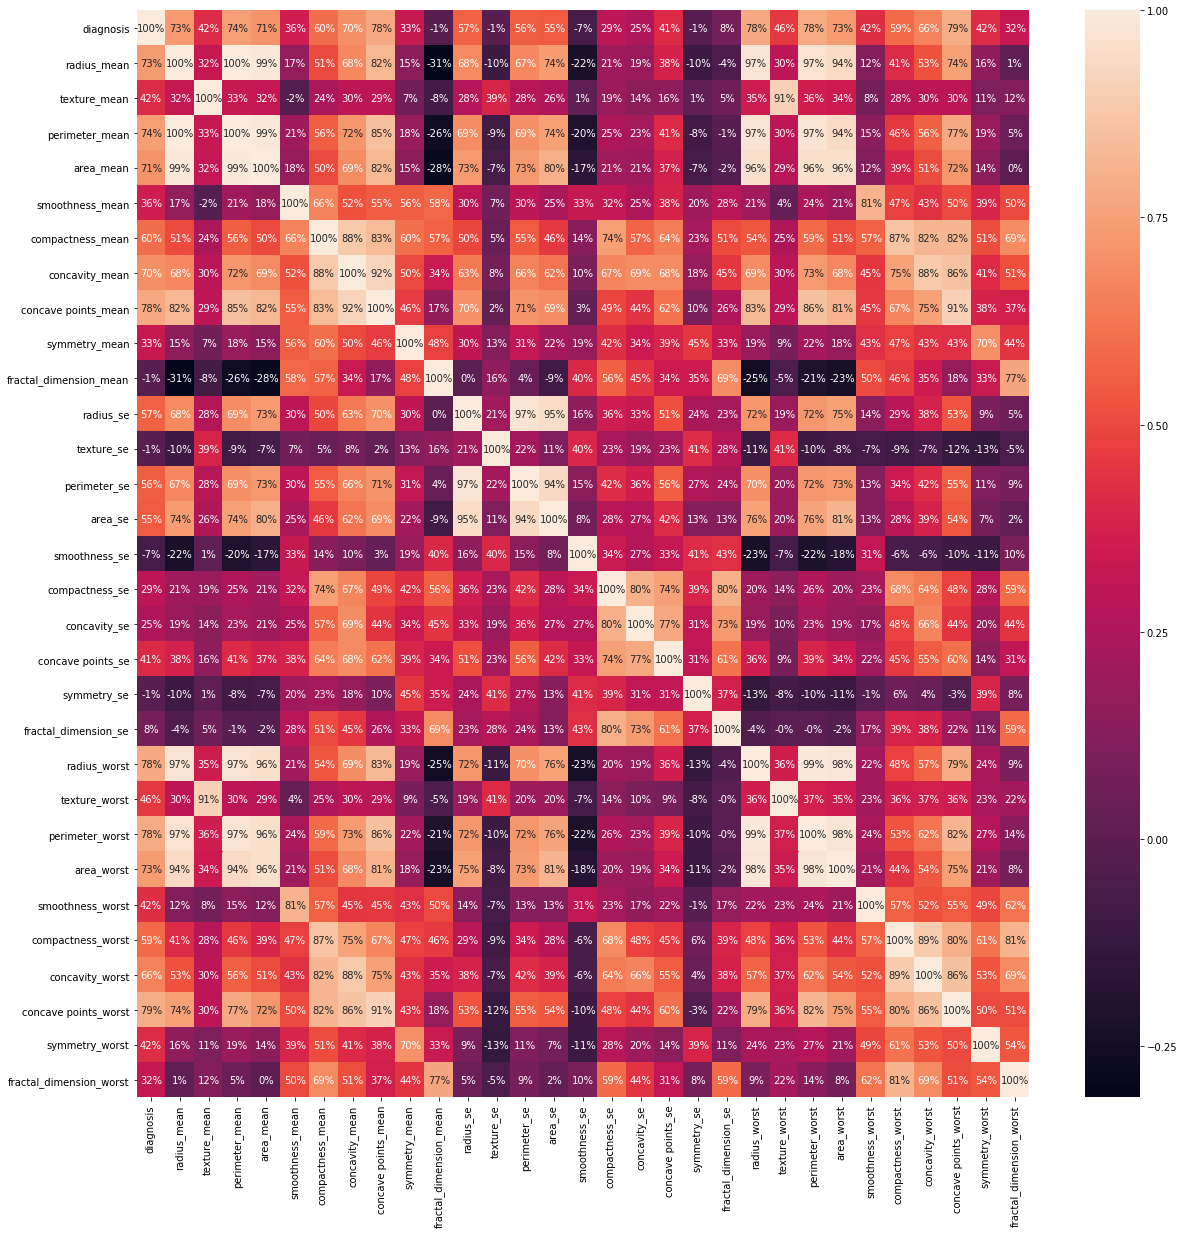

In [7]:
#analyse the data 

plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,:].corr(),annot=True,fmt='.0%')

In [8]:
#delete correlated feature taking only those feature which affect diagosis
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)
df=df.drop(df.columns[7:],axis=1)
# verify remaining columns
df.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

C:\Users\anand\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\anand\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


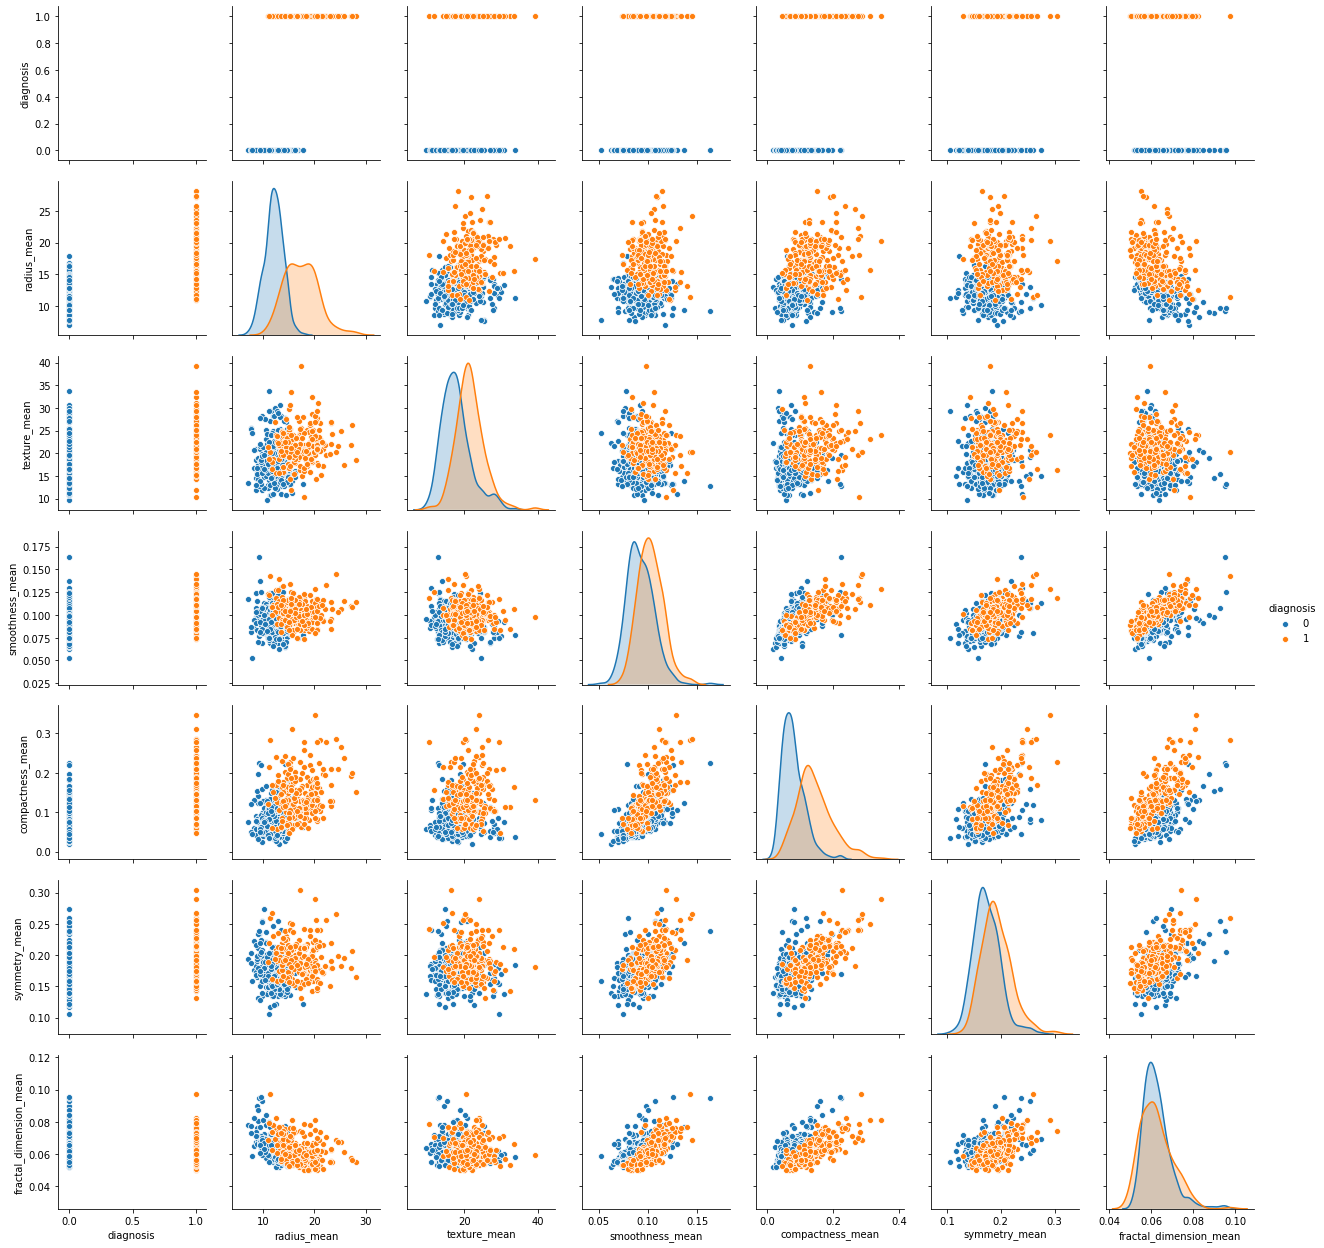

In [9]:
#pair plot to analyse group for creation of menber function
sns.pairplot(df.iloc[:,:],hue='diagnosis')

In [10]:
#create member fuction
mf=[[['gaussmf',{'mean':np.mean(np.arange(4,15)),'sigma':np.std(np.arange(4,15))}]
,['gaussmf',{'mean':np.mean(np.arange(10,20)),'sigma':np.std(np.arange(10,20))}]
,['gaussmf',{'mean':np.mean(np.arange(15,30)),'sigma':np.std(np.arange(15,30))}]],
      [['gaussmf',{'mean':np.mean(np.arange(0,16)),'sigma':np.std(np.arange(0,16))}]
,['gaussmf',{'mean':np.mean(np.arange(12,40)),'sigma':np.std(np.arange(12,30))}]]
   ,[['gaussmf',{'mean':np.mean(np.arange(0,10))/100,
                   'sigma':np.std(np.arange(0,10))/100}],
       ['gaussmf',{'mean':np.mean(np.arange(10,20)/100),
                   'sigma':np.std(np.arange(10,20))/100}]
       ],[['gaussmf',{'mean':np.mean(np.arange(2,20))/100,
                   'sigma':np.std(np.arange(2,20))/100}],
       ['gaussmf',{'mean':np.mean(np.arange(15,35)/100),
                   'sigma':np.std(np.arange(15,35))/100}]
       ],[['gaussmf',{'mean':np.mean(np.arange(100,200))/1000,
                   'sigma':np.std(np.arange(100,200))/1000}],
       ['gaussmf',{'mean':np.mean(np.arange(150,300)/1000),
                   'sigma':np.std(np.arange(150,300))/1000}]
       ],[['gaussmf',{'mean':np.mean(np.arange(0,7))/100,
                   'sigma':np.std(np.arange(0,7))/100}],
       ['gaussmf',{'mean':np.mean(np.arange(5,10)/100),
                   'sigma':np.std(np.arange(5,10))/100}]
       ]]
mf

[[['gaussmf', {'mean': 9.0, 'sigma': 3.1622776601683795}],
  ['gaussmf', {'mean': 14.5, 'sigma': 2.8722813232690143}],
  ['gaussmf', {'mean': 22.0, 'sigma': 4.320493798938574}]],
 [['gaussmf', {'mean': 7.5, 'sigma': 4.6097722286464435}],
  ['gaussmf', {'mean': 25.5, 'sigma': 5.188127472091127}]],
 [['gaussmf', {'mean': 0.045, 'sigma': 0.028722813232690145}],
  ['gaussmf', {'mean': 0.145, 'sigma': 0.028722813232690145}]],
 [['gaussmf', {'mean': 0.105, 'sigma': 0.051881274720911266}],
  ['gaussmf', {'mean': 0.24500000000000002, 'sigma': 0.05766281297335398}]],
 [['gaussmf', {'mean': 0.1495, 'sigma': 0.02886607004772212}],
  ['gaussmf', {'mean': 0.22449999999999998, 'sigma': 0.04330030792808137}]],
 [['gaussmf', {'mean': 0.03, 'sigma': 0.02}],
  ['gaussmf', {'mean': 0.06999999999999999, 'sigma': 0.01414213562373095}]]]

In [11]:
train=df.sample(frac=0.5)


In [12]:
from membership import membershipfunction
mfc = membershipfunction.MemFuncs(mf)
answer=train.pop('diagnosis')
train.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [ ]:
import anfis
anf=anfis.ANFIS(train,answer,mfc)
train=anf.trainHybridJangOffLine(epochs=20)

current error:  6.395698927238853


In [ ]:
anf.plotErrors()
anf.plotResults()